# NYC Transportation Domain

---- Kavya Rao


Data Set :  NYC Traffic Collisions
Link : https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95
Problem Statement: Analyze NYC Collision(Accident) data set using Pandas and Numpy
  	1. Clean data , remove Null values
	2. Drop the unwanted columns
	3. Divide the data set based on the year
	4. Analyze fatalities/injuries based on Borough
	5. Analyze fatalities/injuries based on Month
	6. Analyze fatalities/injuries based on Time (24 Hours)
	7. Display the results using graphs and plots
	8. Apply Regression Analysis to the Accident data set
    
In statistical modeling, regression analysis is a statistical process for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a dependent variable and one or more independent variables (or 'predictors'). More specifically, regression analysis helps one understand how the typical value of the dependent variable (or 'criterion variable') changes when any one of the independent variables is varied, while the other independent variables are held fixed. Most commonly, regression analysis estimates the conditional expectation of the dependent variable given the independent variables – that is, the average value of the dependent variable when the independent variables are fixed. Less commonly, the focus is on a quantile, or other location parameter of the conditional distribution of the dependent variable given the independent variables. In all cases, the estimation target is a function of the independent variables called the regression function. In regression analysis, it is also of interest to characterize the variation of the dependent variable around the regression function which can be described by a probability distribution.


# Data Set Up

In [1]:
import pandas as pd

data = pd.read_csv("NYPD_Motor_Vehicle_Collisions.csv" ,parse_dates=[['DATE', 'TIME']]) 
#Drop unwanted columns
data.drop(["VEHICLE TYPE CODE 5", "VEHICLE TYPE CODE 4", "VEHICLE TYPE CODE 3" ,"CONTRIBUTING FACTOR VEHICLE 5", 
           "CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 3", "ON STREET NAME","CROSS STREET NAME",
           "OFF STREET NAME", "CONTRIBUTING FACTOR VEHICLE 1", "CONTRIBUTING FACTOR VEHICLE 2", "VEHICLE TYPE CODE 1",
           "VEHICLE TYPE CODE 2"], axis = 1, inplace = True)
data= data.dropna()
cols = data.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, unicode)) else x)
data.columns = cols
data

,DATE_TIME,BOROUGH,ZIP_CODE,LATITUDE,LONGITUDE,LOCATION,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,UNIQUE_KEY
0,2015-11-29 20:35:00,MANHATTAN,10011,40.735914,-74.000848,"(40.7359142, -74.000848)",0,0,0,0,0,0,0,0,3343209
3,2015-11-29 18:50:00,QUEENS,11434,40.666697,-73.767128,"(40.6666971, -73.7671284)",0,0,0,0,0,0,0,0,3344840
5,2015-11-29 18:55:00,BROOKLYN,11213,40.679368,-73.931325,"(40.6793681, -73.9313255)",0,0,0,0,0,0,0,0,3343543
6,2015-11-29 09:40:00,BROOKLYN,11210,40.616383,-73.952627,"(40.6163833, -73.9526274)",0,0,0,0,0,0,0,0,3343488
7,2015-11-29 09:35:00,MANHATTAN,10027,40.810934,-73.950600,"(40.8109338, -73.9505996)",0,0,0,0,0,0,0,0,3343300
8,2015-11-29 09:25:00,QUEENS,11367,40.728664,-73.822771,"(40.7286635, -73.8227712)",0,0,0,0,0,0,0,0,3343640
9,2015-11-29 09:23:00,BRONX,10461,40.850304,-73.851368,"(40.8503039, -73.8513675)",0,0,0,0,0,0,0,0,3343403
10,2015-11-29 18:56:00,QUEENS,11372,40.748863,-73.892709,"(40.7488634, -73.8927087)",0,0,0,0,0,0,0,0,3344267
13,2015-11-29 09:06:00,MANHATTAN,10018,40.761391,-74.001736,"(40.761391, -74.0017363)",0,0,0,0,0,0,0,0,3343227
14,2015-11-29 19:00:00,BROOKLYN,11226,40.640945,-73.948513,"(40.6409447, -73.948513)",1,0,1,0,0,0,0,0,3344002


# Divide Data by the Year

In [3]:
data_2012 = data[data.DATE_TIME.dt.year==2012]

data_2013 = data[data.DATE_TIME.dt.year==2013]

data_2014 = data[data.DATE_TIME.dt.year==2014]

data_2015 = data[data.DATE_TIME.dt.year==2015]


# Analyse data by BOROUGH

In [8]:
data_2012_borough = data_2012.groupby(data.BOROUGH).sum().sort(['NUMBER_OF_PERSONS_KILLED','NUMBER_OF_PEDESTRIANS_INJURED'])

data_2013_borough = data_2013.groupby(data.BOROUGH).sum().sort(['NUMBER_OF_PERSONS_KILLED','NUMBER_OF_PEDESTRIANS_INJURED'])

data_2014_borough = data_2014.groupby(data.BOROUGH).sum().sort(['NUMBER_OF_PERSONS_KILLED','NUMBER_OF_PEDESTRIANS_INJURED'])

data_2015_borough = data_2015.groupby(data.BOROUGH).sum().sort(['NUMBER_OF_PERSONS_KILLED','NUMBER_OF_PEDESTRIANS_INJURED'])

C:\Users\Kavya Rao\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\Kavya Rao\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
C:\Users\Kavya Rao\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Kavya Rao\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [9]:
data_2015_borough

,ZIP_CODE,LATITUDE,LONGITUDE,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,NUMBER_OF_PEDESTRIANS_INJURED,NUMBER_OF_PEDESTRIANS_KILLED,NUMBER_OF_CYCLIST_INJURED,NUMBER_OF_CYCLIST_KILLED,NUMBER_OF_MOTORIST_INJURED,NUMBER_OF_MOTORIST_KILLED,UNIQUE_KEY
BOROUGH,,,,,,,,,,,,
STATEN ISLAND,58615046,230809.497599,-421558.138122,1412,11,209,4,29,1,1174,6,18445898431
MANHATTAN,387638357,1576351.058076,-2860539.275847,5895,20,2037,16,1090,1,2768,3,125540620914
BRONX,201480011,786688.286172,-1422826.756528,5099,25,1236,10,337,3,3526,12,62478869652
QUEENS,438513159,1571316.884946,-2849057.384436,9424,45,1742,21,718,6,6964,18,125218438201
BROOKLYN,518460182,1878887.958159,-3417547.823545,12408,56,2671,37,1408,4,8329,15,149965083577


'NUMBER_OF_PERSONS_INJURED' contains the sum value of 'Number_CYCLISTS_INJURED',  'NUMBER_OF_PEDESTRIANS_INJURED','NUMBER_OF_MOTORISTS_INJURED'. Hence from hereafter only 'NUMBER_OF_PERSONS_INJURED' will be considered for analysis.

# Analyse data by Month

In [10]:
data_2012_month = data_2012.groupby(data_2012.DATE_TIME.dt.month).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']]

data_2013_month = data_2013.groupby(data_2013.DATE_TIME.dt.month).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']]

data_2014_month = data_2014.groupby(data_2014.DATE_TIME.dt.month).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']]

data_2015_month = data_2015.groupby(data_2015.DATE_TIME.dt.month).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']]


In [24]:
data_2012_month
# We have only 6 months of data for 2012. Hence I will not be using this for analysis.

,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED
DATE_TIME,,
7,3684,21
8,3591,20
9,3547,19
10,3516,16
11,3123,12
12,3557,22


In [28]:
data_2014_month

,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED
DATE_TIME,,
1,2987,17
2,2325,8
3,2901,13
4,3068,18
5,3399,18
6,3769,16
7,3458,23
8,3353,12
9,3299,19


In [25]:
data_2015_month

,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED
DATE_TIME,,
1,2589,13
2,2001,12
3,2759,8
4,2851,14
5,3573,24
6,3480,16
7,3480,12
8,3496,17
9,3359,9


# Analyse data by HOUR

In [11]:
data_2012_hour = data_2012.groupby(data_2012.DATE_TIME.dt.hour).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']]

data_2013_hour = data_2013.groupby(data_2013.DATE_TIME.dt.hour).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']]

data_2014_hour = data_2014.groupby(data_2014.DATE_TIME.dt.hour).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']]

data_2015_hour = data_2015.groupby(data_2015.DATE_TIME.dt.hour).sum()[['NUMBER_OF_PERSONS_INJURED','NUMBER_OF_PERSONS_KILLED']]

In [27]:
data_2015_hour

,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED
DATE_TIME,,
0,919,6
1,667,10
2,554,1
3,463,3
4,501,5
5,457,5
6,614,1
7,984,3
8,1848,4


# Graphical representation

In the section below, I have attempted to represent the 'NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_CYCLISTS_INJURED', 'NUMNER_OF_MOTORISTS_INJURED' in a graphical format. Visalising tabluar data is helpful in analysing the results,

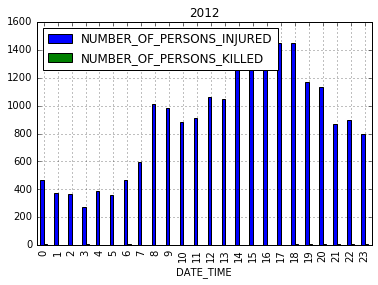

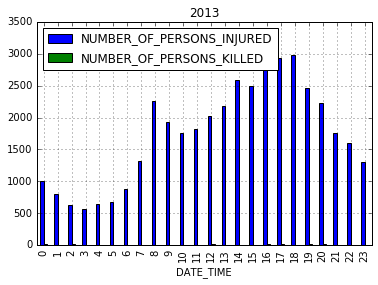

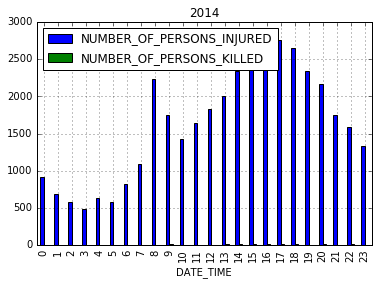

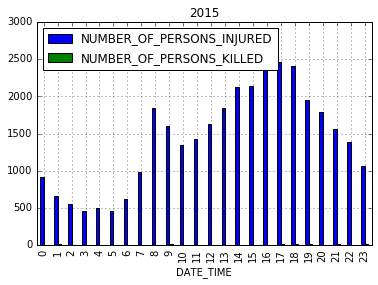

In [12]:
% matplotlib inline
import matplotlib.pyplot as plt

data_2012_hour.plot(kind='bar', title='2012')
plt.grid(True)
data_2013_hour.plot(kind='bar', title='2013')
plt.grid(True)
data_2014_hour.plot(kind='bar', title='2014')
plt.grid(True)
data_2015_hour.plot(kind='bar', title='2015')
plt.grid(True)

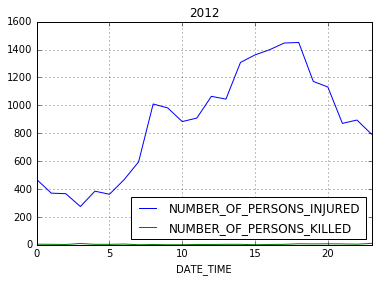

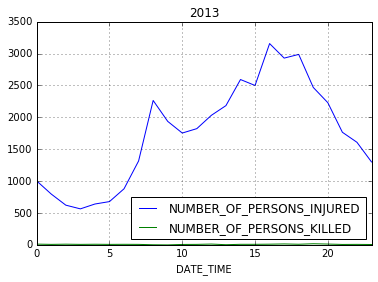

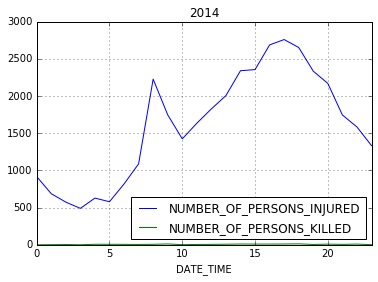

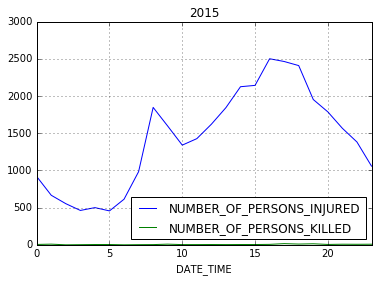

In [13]:
data_2012_hour.plot(title='2012')
plt.grid(True)
data_2013_hour.plot(title='2013')
plt.grid(True)
data_2014_hour.plot(title='2014')
plt.grid(True)
data_2015_hour.plot(title='2015')
plt.grid(True)

In [16]:
data_2015_cycle = data_2015.groupby(data_2015.DATE_TIME.dt.hour).sum()[['NUMBER_OF_CYCLIST_INJURED']]

data_2014_cycle = data_2014.groupby(data_2014.DATE_TIME.dt.hour).sum()[['NUMBER_OF_CYCLIST_INJURED']]

data_2013_cycle = data_2013.groupby(data_2013.DATE_TIME.dt.hour).sum()[['NUMBER_OF_CYCLIST_INJURED']]

data_2012_cycle = data_2012.groupby(data_2013.DATE_TIME.dt.hour).sum()[['NUMBER_OF_CYCLIST_INJURED']]

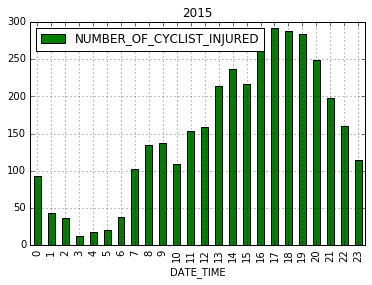

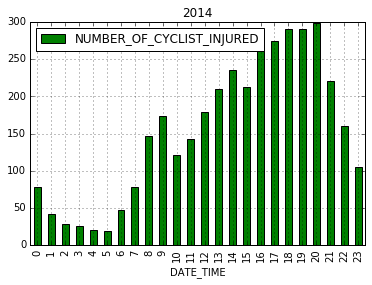

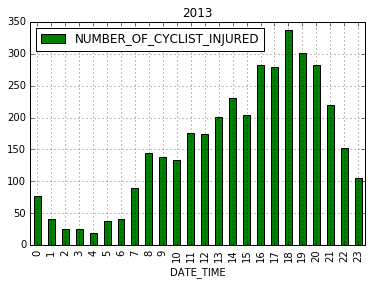

In [17]:
data_2015_cycle.plot(kind = 'bar', color = 'g', grid = True, title = "2015")
data_2014_cycle.plot(kind = 'bar', color = 'g', grid = True, title = "2014")
data_2013_cycle.plot(kind = 'bar', color = 'g', grid = True, title = "2013")


In [18]:
data_2015_motor = data_2015.groupby(data_2015.DATE_TIME.dt.hour).sum()[['NUMBER_OF_MOTORIST_INJURED']]

data_2014_motor = data_2014.groupby(data_2014.DATE_TIME.dt.hour).sum()[['NUMBER_OF_MOTORIST_INJURED']]

data_2013_motor = data_2013.groupby(data_2013.DATE_TIME.dt.hour).sum()[['NUMBER_OF_MOTORIST_INJURED']]

data_2012_motor = data_2012.groupby(data_2013.DATE_TIME.dt.hour).sum()[['NUMBER_OF_MOTORIST_INJURED']]

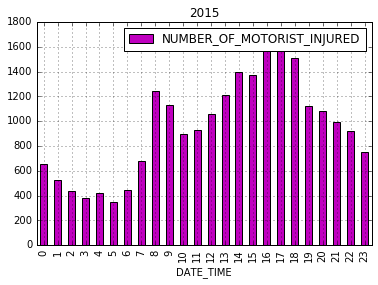

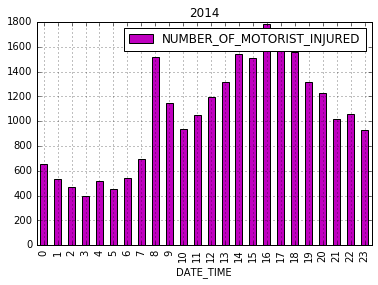

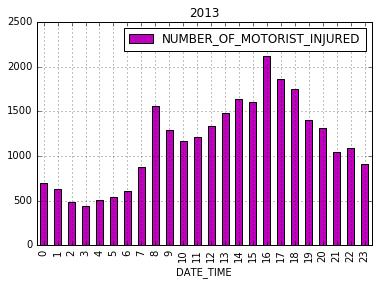

In [19]:
data_2015_motor.plot(kind = 'bar', color = 'm', grid = True, title = "2015")
data_2014_motor.plot(kind = 'bar', color = 'm', grid = True, title = "2014")
data_2013_motor.plot(kind = 'bar', color = 'm', grid = True, title = "2013")

Result: By observing the graphs given above, we can draw a assumption that More injuries occure between 4PM to 8PM.
Cyclists or Motirists can be warned that probability of a mishap is higher during the evening hours. 
We can also prove that rush hour or peak hour traffic is probably between 4PM to 8PM.

# Regression Analysis

In this section I have plotted a scatter plot and also plotted the curve of best fit on the same. More about this wil be dealt in the next section.

In [145]:
Y = data_2015_hour['NUMBER_OF_PERSONS_INJURED'].values
Y

array([ 919,  667,  554,  463,  501,  457,  614,  984, 1848, 1597, 1341,
       1428, 1622, 1845, 2126, 2144, 2502, 2465, 2410, 1954, 1788, 1567,
       1383, 1059], dtype=int64)

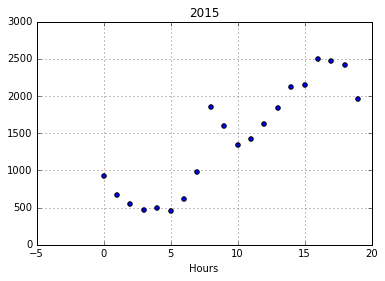

In [146]:
import numpy as np
fig = plt.figure()

Y = np.array([ 919,  667,  554,  463,  501,  457,  614,  984, 1848, 1597, 1341,
       1428, 1622, 1845, 2126, 2144, 2502, 2465, 2410, 1954,])
X = range(len(Y))
plt.grid(True)
plt.title('2015')
plt.xlabel("Hours")
plt.scatter(X,Y)
plt.title('2015')
plt.show()

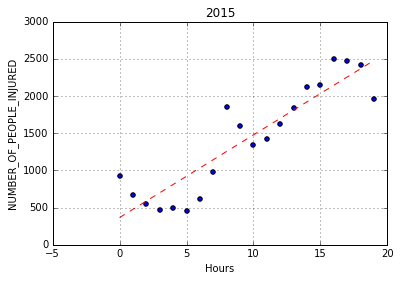

In [105]:
from scipy.interpolate import*

p1= np.polyfit(X,Y,1)

plt.grid(True)
plt.scatter(X,Y)
plt.title('2015')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")
plt.plot(X,np.polyval(p1,X), 'r--')
plt.show()

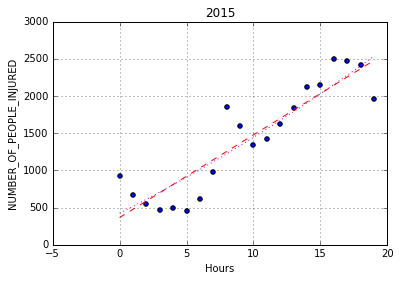

In [106]:
p1= np.polyfit(X,Y,1)

p2= np.polyfit(X,Y,2)

plt.grid(True)
plt.scatter(X,Y)
plt.title('2015')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")
plt.plot(X,np.polyval(p1,X), 'r--')

plt.plot(X,np.polyval(p2,X), 'm:')
plt.show()

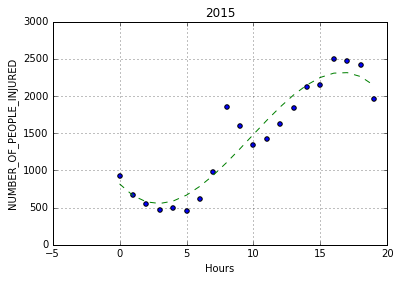

In [107]:
from scipy.interpolate import*



p3= np.polyfit(X,Y,3)

plt.grid(True)
plt.scatter(X,Y)
plt.title('2015')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")

plt.plot(X,np.polyval(p3,X), 'g--')
plt.show()

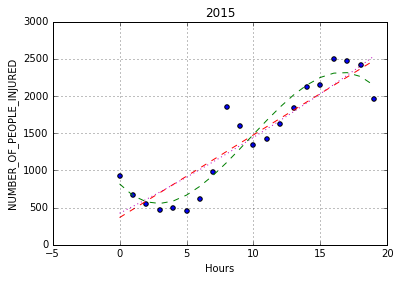

In [108]:
p3= np.polyfit(X,Y,3)
p1= np.polyfit(X,Y,1)

p2= np.polyfit(X,Y,2)

plt.grid(True)
plt.scatter(X,Y)
plt.title('2015')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")
plt.plot(X,np.polyval(p1,X), 'r--')
plt.plot(X,np.polyval(p2,X), 'm:')

plt.plot(X,np.polyval(p3,X), 'g--')
plt.show()

In [109]:
p3 = np.polyfit(X,Y,3)
p3

array([  -1.35742742,   39.70405437, -194.71534519,  818.5515528 ])

In [110]:
np.polyval(p3, 21)

1667.8819696299549

In [62]:
from scipy.stats import*

slope,intercept,r_value,p_value,std_err=linregress(X,Y)
print(pow(r_value,2))

0.814633958656


In [63]:
slope,intercept,r_value,p_value,std_err=linregress(X,Y)
print(std_err)

12.49902337


# Regression Analysis on Sampled Data

In [149]:
Y = data_2015_hour['NUMBER_OF_PERSONS_INJURED'].values
X = range(len(Y))

Divide data set into Training & Test data set.
I have attempted to divide the data by taking around 13 values and then I will apply regression Analysis to predict the other unkown 11 values.

Training : [[0,2,4,5,7,10,11,13,15,19,20,21,23]   - 60%
Test :  [1,3,6,8,9,12,14,16,17,18,22]  - 40%

In [150]:
print(Y)
print(X)

[ 919  667  554  463  501  457  614  984 1848 1597 1341 1428 1622 1845 2126
 2144 2502 2465 2410 1954 1788 1567 1383 1059]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [151]:
Y = np.array([ 919,    554 ,   501,  457,    984, 1341 ,1428 , 1845 ,2144 , 1954 ,1788 ,1567,  1059])
X = np.array([0,2,4,5,7,10,11,13,15,19,20,21,23])

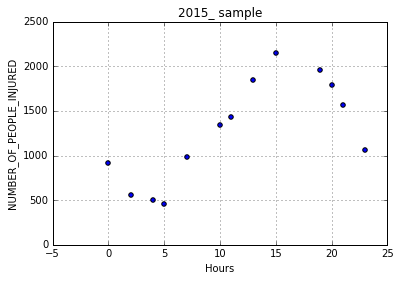

In [152]:


# Plot a scatter plot using the 2015_sample

plt.grid(True)
plt.scatter(X,Y)
plt.title('2015_ sample')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")


plt.show()

The line of best fit is constructed using the algorthm 'Least Sqared Methods'. This alogrith has been explained in the section 'Algorithm' 

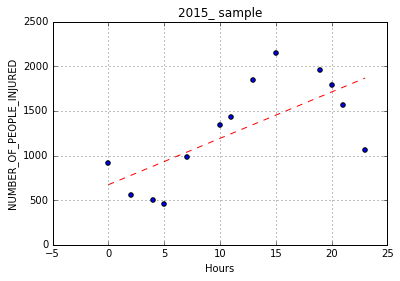

In [153]:

plt.grid(True)
plt.scatter(X,Y)
plt.title('2015_ sample')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")
plt.plot(X,np.polyval(p1,X), 'r--')

plt.show()

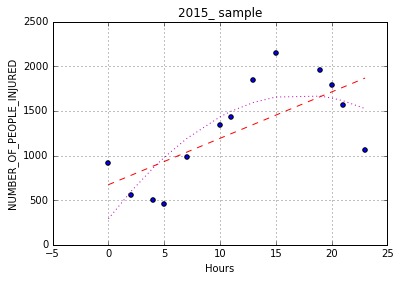

In [154]:
# change to degree 2 polynomial. I have nor a parabolic curve, which does not fit my plotted points.

p2= np.polyfit(X,Y,2)  

plt.grid(True)
plt.scatter(X,Y)
plt.title('2015_ sample')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")
plt.plot(X,np.polyval(p1,X), 'r--')
plt.plot(X,np.polyval(p2,X), 'm:')


plt.show()

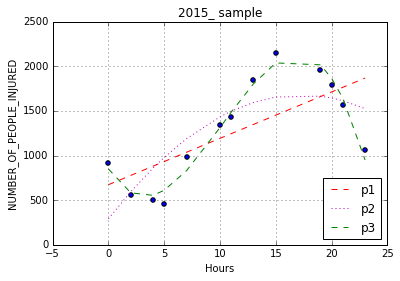

In [164]:
#with a polynomial of degree 3 , I now have a curve of best fit.
p3= np.polyfit(X,Y,3)
p1= np.polyfit(X,Y,1)
p2= np.polyfit(X,Y,2)

plt.grid(True)
plt.scatter(X,Y)
plt.title('2015_ sample')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")
plt.plot(X,np.polyval(p1,X), 'r--', label ='p1')
plt.plot(X,np.polyval(p2,X), 'm:', label='p2')

plt.plot(X,np.polyval(p3,X), 'g--', label = 'p3')
plt.legend(loc="lower right")
plt.show()

Using the curve of best fit (green dotted line), I can now predict an unkown 'Y' for a given 'X'
The equation for the curve is now:
Yfit=ax^{3}+bx^{2}+cx+d
To solve for Yfit, for a given X, we will need the coefficients, a,b,c,d. 
The coefficients can be found using the polyfit method.

In [138]:
#find values for the co-effecients.
np.polyfit(X,Y,3)

array([  -1.2245285 ,   37.18728163, -203.14266583,  849.89174001])

After obtating the co-effs, we will have to substitue the values in the equation and solve for value of Yfit. This can be done using the polyval method, which takes in 2 parameters, the co-effs and the X value.

In [162]:
#Predict value at X = 12 (12 in the noon).

y_fit_12 = np.polyval(p3, 12)
print "Y_fit Value at 12 Noon :", y_fit_12

Y_fit Value at 12 Noon : 1651.16305226


When the predicted value is compared with the actual value, the you can see that the values are pretty close and the prediction is working just fine.

In [166]:
#Predict value at X = 19 (7 PM)
y_fit_19 = np.polyval(p3, 19)
print "Y_fit Value at 7 PM :", y_fit_19

Y_fit Value at 5 PM : 2015.7487581


In [165]:
#Predict value at X = 17 (5 PM)
y_fit_17 = np.polyval(p3, 17)
print "Y_fit Value at 5 PM :", y_fit_17

Y_fit Value at 5 PM : 2127.48227855


In [139]:
np.polyval(p3, 3)

542.08700761790408

In [140]:
np.polyval(p3, 6)

705.27972715267515

We can also calculate the std error and R squared value for the analysis using the built in methods as shown below.

In [141]:
from scipy.stats import*

slope,intercept,r_value,p_value,std_err=linregress(X,Y)
print(pow(r_value,2))

0.482835544461


In [142]:
slope,intercept,r_value,p_value,std_err=linregress(X,Y)
print(std_err)

16.2089191061


I have now attempted to plot the actual vs the fitted values. 
Using regression analysis method, predictions can be done with a veyr low error rate and you may not be able to get the prefect predicted value, but the predictions are very close.

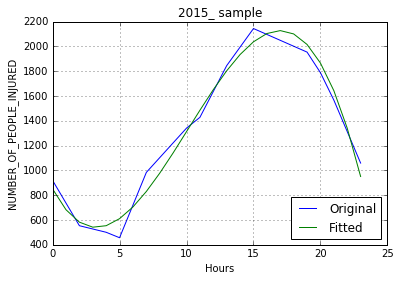

In [143]:

x_fit = np.arange(24)
p3 = np.polyfit(X,Y,3)
y_fit = []
for i in range(len(x_fit)):
    y_fit.append(np.polyval(p3, i))


plt.grid(True)
plt.plot(X, Y, label = "Original")
plt.plot(x_fit, y_fit, label = "Fitted")
plt.title('2015_ sample_Prediction')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")

plt.legend(loc="lower right")
plt.show()

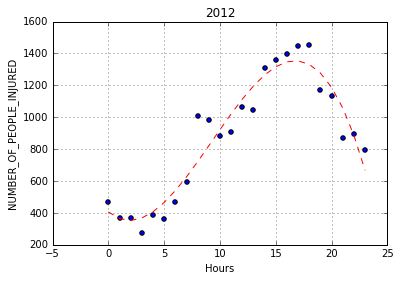

In [71]:
# 2012 data

from scipy.interpolate import*
Y = data_2012_hour['NUMBER_OF_PERSONS_INJURED'].values
X = range(len(Y))
p3= np.polyfit(X,Y,3)

plt.grid(True)
plt.scatter(X,Y)
plt.title('2012')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")
plt.plot(X,np.polyval(p3,X), 'r--')
plt.show()

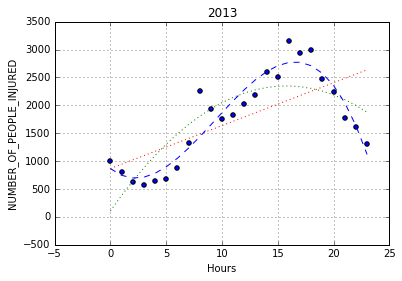

In [70]:
# 2013 data

from scipy.interpolate import*
Y = data_2013_hour['NUMBER_OF_PERSONS_INJURED'].values
X = range(len(Y))
p1 = np.polyfit(X,Y,1)
p2= np.polyfit(X,Y,2)
p3= np.polyfit(X,Y,3)

plt.grid(True)
plt.scatter(X,Y)
plt.title('2013')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")
plt.plot(X,np.polyval(p1,X), 'r:')
plt.plot(X,np.polyval(p2,X), 'g:')
plt.plot(X,np.polyval(p3,X), 'b--')
plt.show()

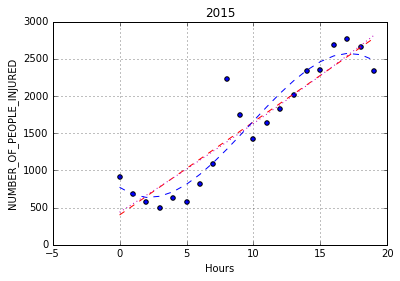

In [92]:

Y = np.array([ 918,  688,  575,  491,  629,  580,  819, 1089, 2228, 1748, 1425,1635, 1828, 2007, 
              2341, 2356, 2688, 2760, 2653, 2335])
X = range(len(Y))
X
p3= np.polyfit(X,Y,3)
p1= np.polyfit(X,Y,1)
p2= np.polyfit(X,Y,2)

plt.grid(True)
plt.scatter(X,Y)
plt.title('2014')
plt.xlabel("Hours")
plt.ylabel("NUMBER_OF_PEOPLE_INJURED")
plt.plot(X,np.polyval(p1,X), 'r--')
plt.plot(X,np.polyval(p2,X), 'm:')
plt.plot(X,np.polyval(p3,X), 'b--')

plt.show()

In [100]:
np.polyval(p3, 23)


1469.9760734083538

In [96]:
data_2014_hour

,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED
DATE_TIME,,
0,918,1
1,688,3
2,575,5
3,491,2
4,629,8
5,580,8
6,819,7
7,1089,6
8,2228,8
